# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | villa huidobro
Processing Record 2 of Set 1 | mocajuba
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | pangody
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | bonthe
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | slave lake
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | adamstown
P

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,villa huidobro,-34.8383,-64.5869,14.43,44,86,3.64,AR,1717977119
1,mocajuba,-2.5842,-49.5072,23.58,98,85,0.91,BR,1717977119
2,yellowknife,62.4560,-114.3525,17.45,53,75,3.60,CA,1717977119
3,pangody,65.8500,74.4859,8.33,66,100,5.93,RU,1717977119
4,grytviken,-54.2811,-36.5092,-7.15,76,20,5.41,GS,1717977119


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("../outputcities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("../outputcities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa huidobro,-34.8383,-64.5869,14.43,44,86,3.64,AR,1717977119
1,mocajuba,-2.5842,-49.5072,23.58,98,85,0.91,BR,1717977119
2,yellowknife,62.4560,-114.3525,17.45,53,75,3.60,CA,1717977119
3,pangody,65.8500,74.4859,8.33,66,100,5.93,RU,1717977119
4,grytviken,-54.2811,-36.5092,-7.15,76,20,5.41,GS,1717977119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

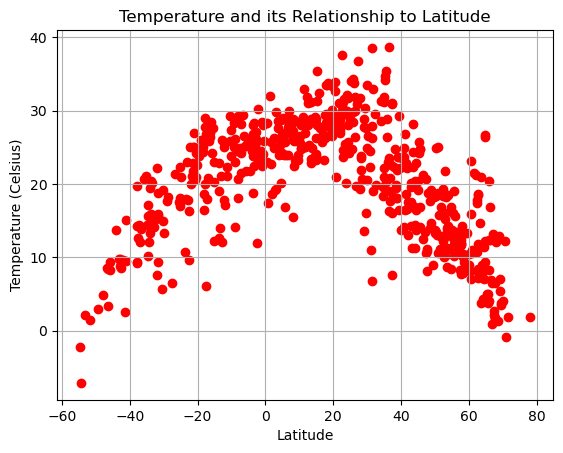

In [83]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = "red")

# Incorporate the other graph properties
plt.title("Temperature and its Relationship to Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

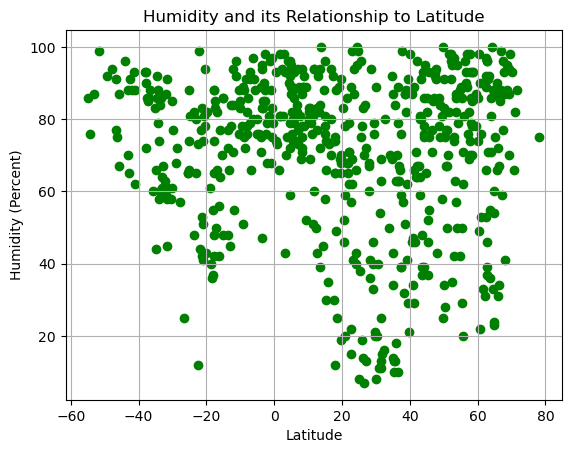

In [84]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "green")

# Incorporate the other graph properties
plt.title("Humidity and its Relationship to Latitude")
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

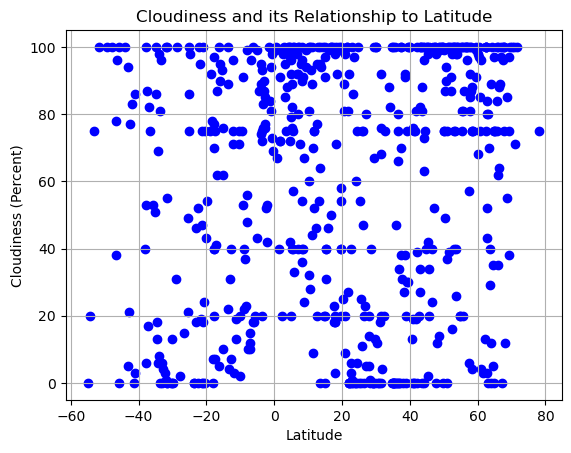

In [85]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "blue")

# Incorporate the other graph properties
plt.title("Cloudiness and its Relationship to Latitude")
plt.ylabel("Cloudiness (Percent)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

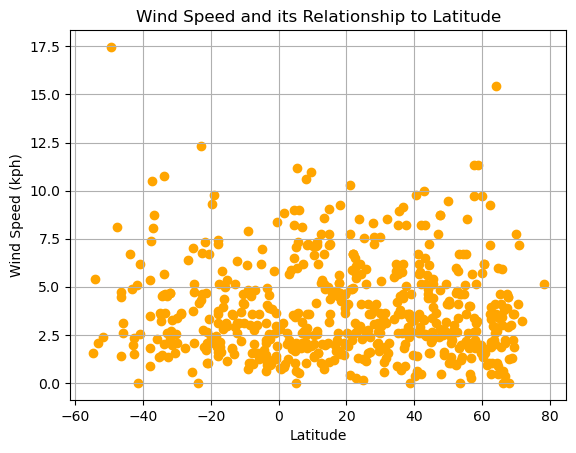

In [86]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "orange")

# Incorporate the other graph properties
plt.title("Wind Speed and its Relationship to Latitude")
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WindSpeed.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernhemidf = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northernhemidf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,17.45,53,75,3.60,CA,1717977119
3,pangody,65.8500,74.4859,8.33,66,100,5.93,RU,1717977119
6,bonthe,7.5264,-12.5050,26.89,81,71,2.71,SL,1717977120
7,stanley,54.8680,-1.6985,8.40,88,20,2.06,GB,1717977120
10,bethel,41.3712,-73.4140,18.66,66,75,2.57,US,1717977071


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernhemidf = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southernhemidf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa huidobro,-34.8383,-64.5869,14.43,44,86,3.64,AR,1717977119
1,mocajuba,-2.5842,-49.5072,23.58,98,85,0.91,BR,1717977119
4,grytviken,-54.2811,-36.5092,-7.15,76,20,5.41,GS,1717977119
5,arraial do cabo,-22.9661,-42.0278,23.03,80,18,12.32,BR,1717976910
8,port-aux-francais,-49.3500,70.2167,2.96,92,100,17.47,TF,1717977120


###  Temperature vs. Latitude Linear Regression Plot

The slope is -1.8462218952708083
The intervept is 73.7989613693202
The r-value is -0.7606877079106437
The p-value is 0.00000
The standard error is 0.07790036885144618


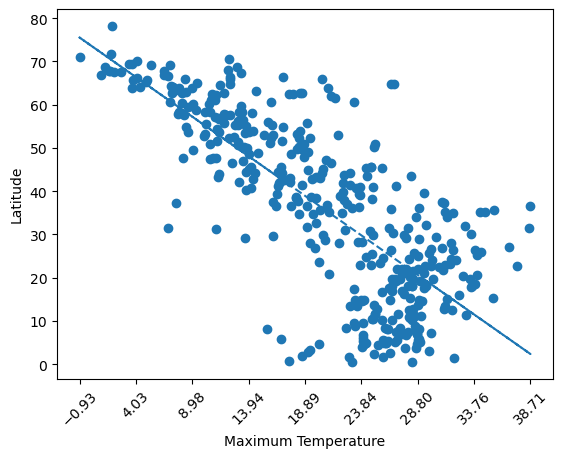

In [90]:
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(northernhemidf['Max Temp'], northernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * northernhemidf['Max Temp']+pe_int

numberticks=9
maxtempmin=northernhemidf['Max Temp'].min()
maxtempmax=northernhemidf['Max Temp'].max()
ticks = np.linspace(maxtempmin,maxtempmax, numberticks)

plt.scatter(northernhemidf['Max Temp'], northernhemidf['Lat'])
plt.plot(northernhemidf['Max Temp'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.show()

The slope is 1.4979599787072106
The intervept is -49.74797545814765
The r-value is 0.7786388923434169
The p-value is 0.00000
The standard error is 0.09231252165422381


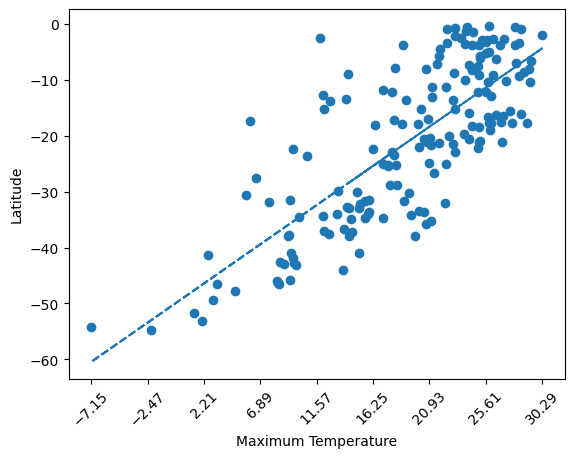

In [91]:
# Linear regression on Southern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(southernhemidf['Max Temp'], southernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * southernhemidf['Max Temp']+pe_int

numberticks=9
maxtempmin=southernhemidf['Max Temp'].min()
maxtempmax=southernhemidf['Max Temp'].max()
ticks = np.linspace(maxtempmin,maxtempmax, numberticks)

plt.scatter(southernhemidf['Max Temp'], southernhemidf['Lat'])
plt.plot(southernhemidf['Max Temp'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** There is a statistically significant relationship between maximum temperature in cities and latitude in both the northern and southern hemispheres. In the northern hemisphere, as latitude decreases, maximum temperature increases. In the southern hemisphere, as latitude increases, maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The slope is -0.012331261438513512
The intervept is 36.616166179136286
The r-value is -0.014296838914573822
The p-value is 0.77260
The standard error is 0.04264434401531969


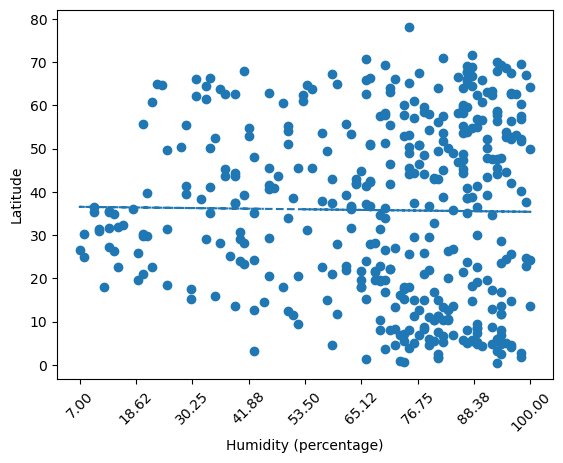

In [92]:
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(northernhemidf['Humidity'], northernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * northernhemidf['Humidity']+pe_int

numberticks=9
humidmin=northernhemidf['Humidity'].min()
humidmax=northernhemidf['Humidity'].max()
ticks = np.linspace(humidmin,humidmax, numberticks)

plt.scatter(northernhemidf['Humidity'], northernhemidf['Lat'])
plt.plot(northernhemidf['Humidity'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Humidity (percentage)')
plt.ylabel('Latitude')
plt.show()

The slope is 0.018673908378607433
The intervept is -22.454339888586045
The r-value is 0.02201440325719609
The p-value is 0.77374
The standard error is 0.06485224107935895


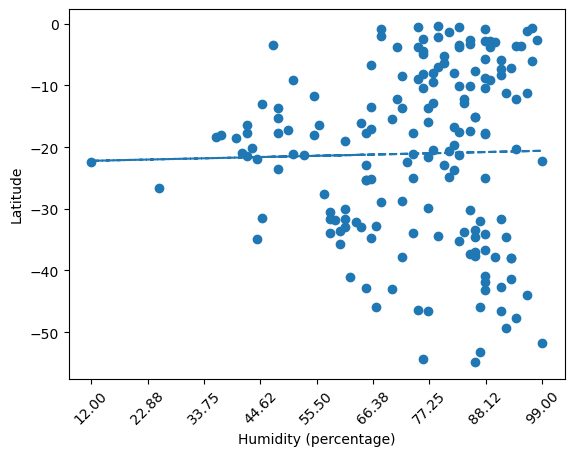

In [93]:
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(southernhemidf['Humidity'], southernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * southernhemidf['Humidity']+pe_int

numberticks=9
humidmin=southernhemidf['Humidity'].min()
humidmax=southernhemidf['Humidity'].max()
ticks = np.linspace(humidmin,humidmax, numberticks)

plt.scatter(southernhemidf['Humidity'], southernhemidf['Lat'])
plt.plot(southernhemidf['Humidity'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Humidity (percentage)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** There is no statistically significant relationship between humidity and latitude in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The slope is 0.03465393537357953
The intervept is 33.64682615884776
The r-value is 0.06334542702374782
The p-value is 0.19999
The standard error is 0.02699619470401869


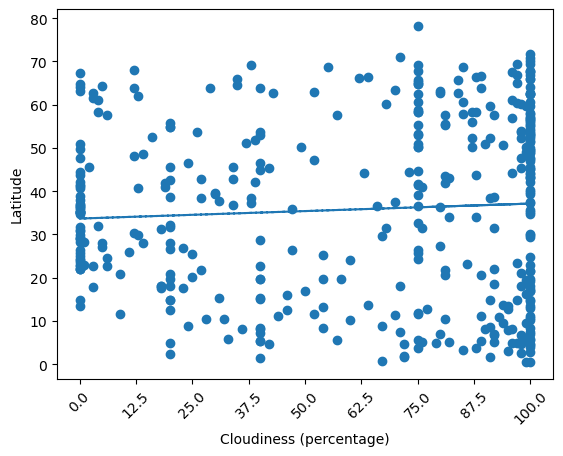

In [94]:
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(northernhemidf['Cloudiness'], northernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * northernhemidf['Cloudiness']+pe_int

numberticks=9
cloudmin=northernhemidf['Cloudiness'].min()
cloudmax=northernhemidf['Cloudiness'].max()
ticks = np.linspace(cloudmin,cloudmax, numberticks)

plt.scatter(northernhemidf['Cloudiness'], northernhemidf['Lat'])
plt.plot(northernhemidf['Cloudiness'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Cloudiness (percentage)')
plt.ylabel('Latitude')
plt.show()

The slope is 0.0470535251453334
The intervept is -23.5339099969393
The r-value is 0.12284979286008262
The p-value is 0.10735
The standard error is 0.029068157078004152


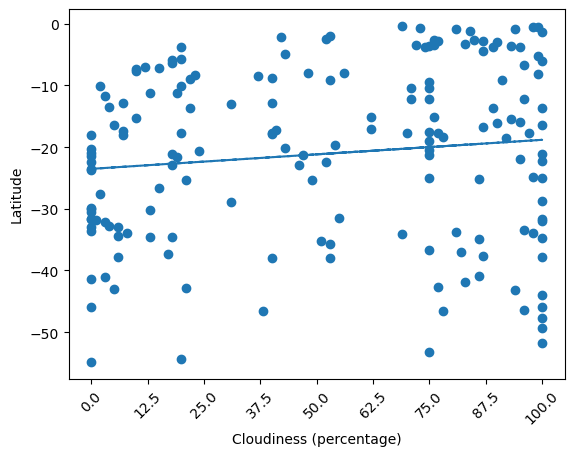

In [95]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(southernhemidf['Cloudiness'], southernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * southernhemidf['Cloudiness']+pe_int

numberticks=9
cloudmin=southernhemidf['Cloudiness'].min()
cloudmax=southernhemidf['Cloudiness'].max()
ticks = np.linspace(cloudmin,cloudmax, numberticks)

plt.scatter(southernhemidf['Cloudiness'], southernhemidf['Lat'])
plt.plot(southernhemidf['Cloudiness'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Cloudiness (percentage)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** There is no statistically significant relationship between cloudiness and latitude in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The slope is -0.6085807829257848
The intervept is 38.10635281640468
The r-value is -0.0745888766091008
The p-value is 0.13113
The standard error is 0.4023194625023852


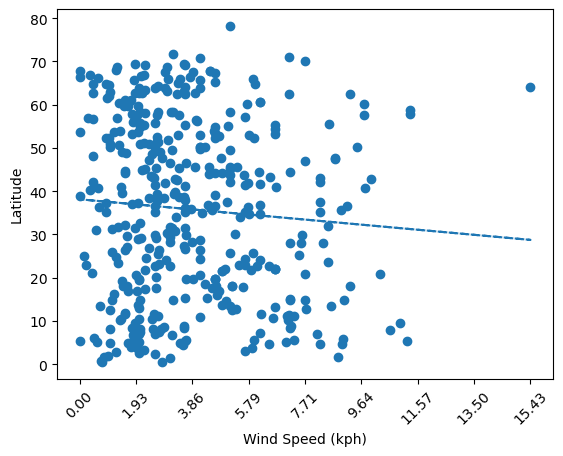

In [96]:
# Linear regression on Northern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(northernhemidf['Wind Speed'], northernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * northernhemidf['Wind Speed']+pe_int

numberticks=9
windmin=northernhemidf['Wind Speed'].min()
windmax=northernhemidf['Wind Speed'].max()
ticks = np.linspace(windmin,windmax, numberticks)

plt.scatter(northernhemidf['Wind Speed'], northernhemidf['Lat'])
plt.plot(northernhemidf['Wind Speed'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Latitude')
plt.show()

The slope is -1.061631234780109
The intervept is -17.210092548006056
The r-value is -0.18666365696132098
The p-value is 0.01393
The standard error is 0.4272821721446019


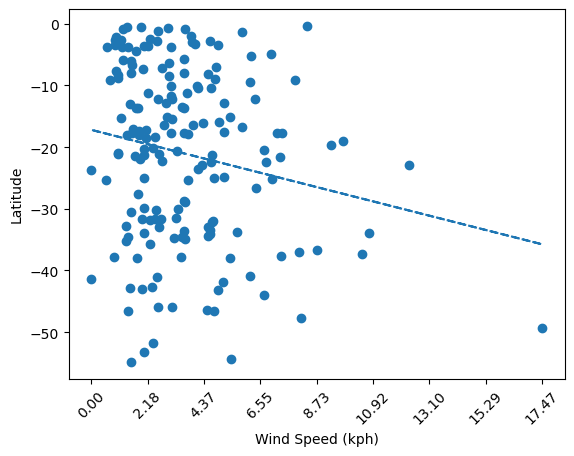

In [97]:
# Linear regression on Southern Hemisphere
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(southernhemidf['Wind Speed'], southernhemidf['Lat']) 
pvaluedec="{:.5f}".format(pe_p)
print(f"The slope is {pe_slope}")
print(f"The intervept is {pe_int}")
print(f"The r-value is {pe_r}")
print(f"The p-value is {pvaluedec}")
print(f"The standard error is {pe_std_err}")

pe_fit=pe_slope * southernhemidf['Wind Speed']+pe_int

numberticks=9
windmin=southernhemidf['Wind Speed'].min()
windmax=southernhemidf['Wind Speed'].max()
ticks = np.linspace(windmin,windmax, numberticks)

plt.scatter(southernhemidf['Wind Speed'], southernhemidf['Lat'])
plt.plot(southernhemidf['Wind Speed'], pe_fit,"--")
plt.xticks(ticks, rotation=45)
plt.locator_params(axis='x',nbins=10)
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** There is no statistically significant relationship between wind speed and latitude in both the northern and southern hemispheres.